In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Auto.csv')

# fix horsepower feature and drop invalid rows
df = pd.read_csv('Auto.csv', na_values='?')
df = df.dropna(subset=['horsepower','mpg'])
df['horsepower'] = df['horsepower'].astype(float)

# a) Ordinary Least Squares Regression
y = df['mpg'].values # selecting mpg as the target
x = df['horsepower'].values  # selecting horsepower feature/predictor
x = sm.add_constant(x)  # Add a constant term (bias)
result = sm.OLS(y, x).fit()  # Fit the model
print(result.summary())  # Print the summary of the regression results


new_X = pd.DataFrame({'const': [1], 'horsepower': [98]})
preds = result.get_prediction(new_X).summary_frame(alpha=0.05)

print("\nPredicted mpg and intervals for horsepower = 98:")
print(preds[['mean', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower', 'obs_ci_upper']])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        21:49:21   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

# i) the p-values are 0, so the relationship between and mpg and horsepower is statistically significant.
# ii) The R-squared vaslue is 0.606 which means that 60.6% of the variance in horsepower can be explained by mpg, so its a failry good predictor.
# iii) Negative, if mpg increases, horsepower decreases. The converse is true as well.
# iv) 39.94 0 0.1578(98) = 24.47 


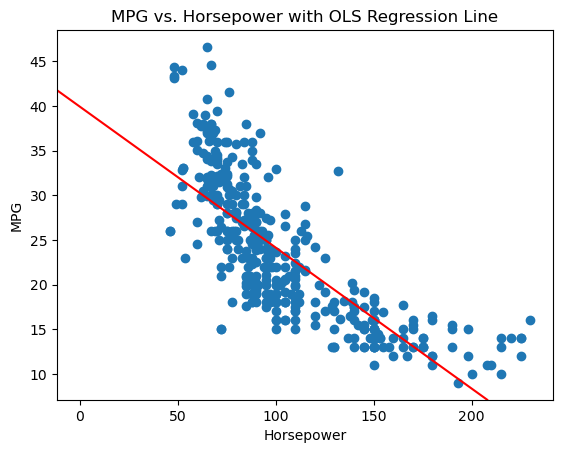

In [64]:
# b)

intercept, slope = result.params

#print(x.shape)
x_no_const = x[:, 1]  # deleting bias column 

#Create plot
fig, ax = plt.subplots()
ax.scatter(x_no_const, y)
# Plot regression line using ax.axline
ax.axline((0, intercept), slope=slope, color='red', label='OLS Regression Line')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs. Horsepower with OLS Regression Line')

plt.show()

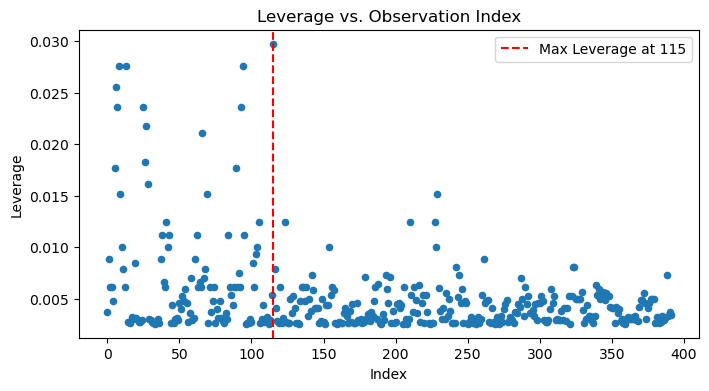

Observation with highest leverage: index 115, leverage = 0.0298


In [ ]:
# c)

influence = result.get_influence()

# Compute leverage and find max
leverage = influence.hat_matrix_diag
max_idx = np.argmax(leverage)

# Plot leverage vs. index
plt.figure(figsize=(8,4))
plt.scatter(np.arange(len(leverage)), leverage, s=20)
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.title('Leverage vs. Observation Index')
plt.axvline(max_idx, color='red', linestyle='--', label=f'Max Leverage at {max_idx}')
plt.legend()
plt.show()

# Print the observation with highest leverage
print(f"Observation with highest leverage: index {max_idx}, leverage = {leverage[max_idx]:.4f}")



# the leverage‐vs‐index plot highlights observation 115 as having the highest leverage (≈ 0.0298). this confirms that point 115 is the most “extreme” in terms of leverage.
